### Importing dependencies

In [1]:
#importing the libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

### Data collection and visualizing

In [129]:
df =pd.read_csv('data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## visualizing dataset

In [130]:
from autoviz.AutoViz_Class import AutoViz_Class

In [131]:
AV = AutoViz_Class()

Shape of your Data Set loaded: (7043, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  11
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  6
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    21 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['customerID']
To fix these data quality issues in the dataset, imp

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
customerID,object,0.000000,100,,,Possible ID column: drop before modeling step.
gender,object,0.000000,0,,,No issue
SeniorCitizen,int64,0.000000,0,0.000000,1.000000,No issue
Partner,object,0.000000,0,,,No issue
Dependents,object,0.000000,0,,,No issue
tenure,int64,0.000000,1,0.000000,72.000000,No issue
PhoneService,object,0.000000,0,,,No issue
MultipleLines,object,0.000000,0,,,No issue
InternetService,object,0.000000,0,,,No issue
OnlineSecurity,object,0.000000,0,,,No issue


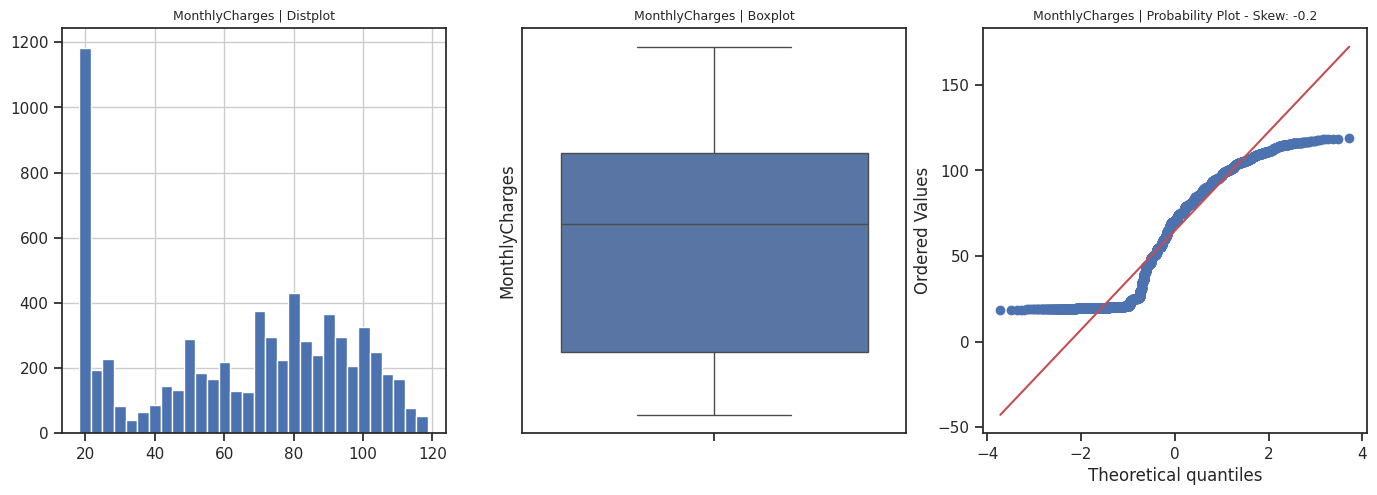

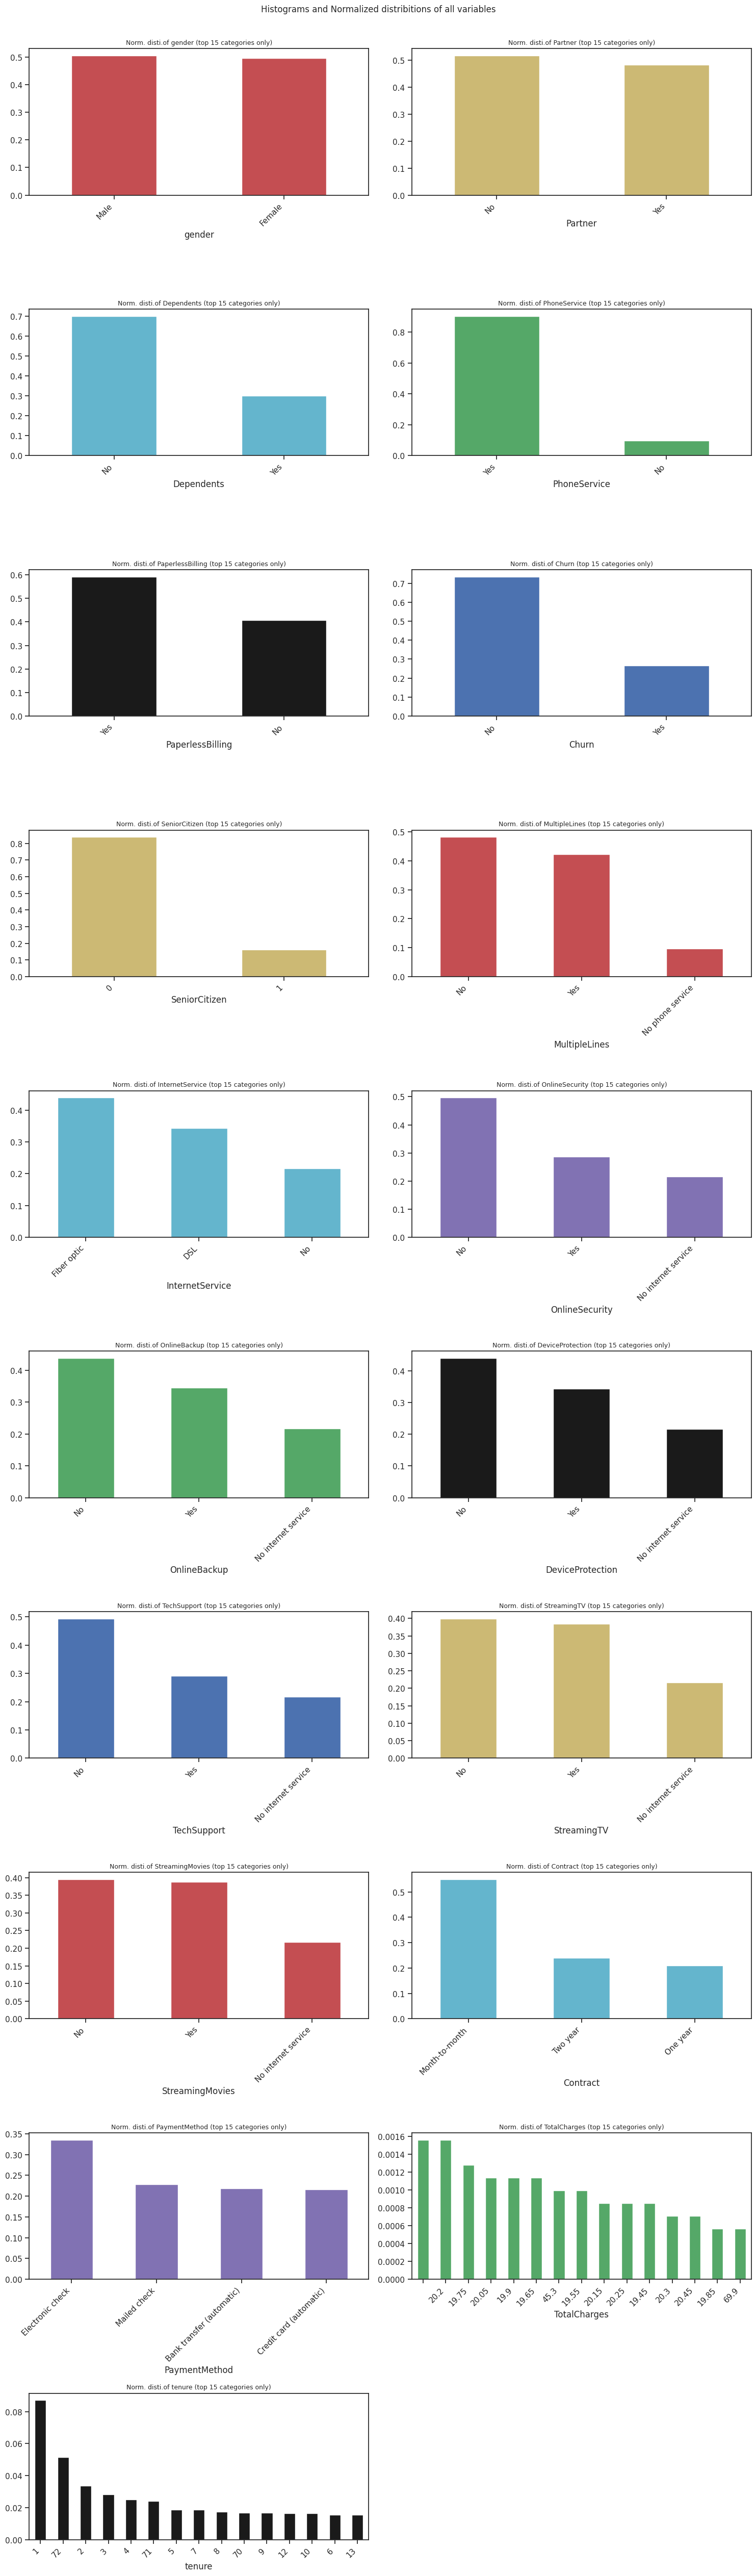

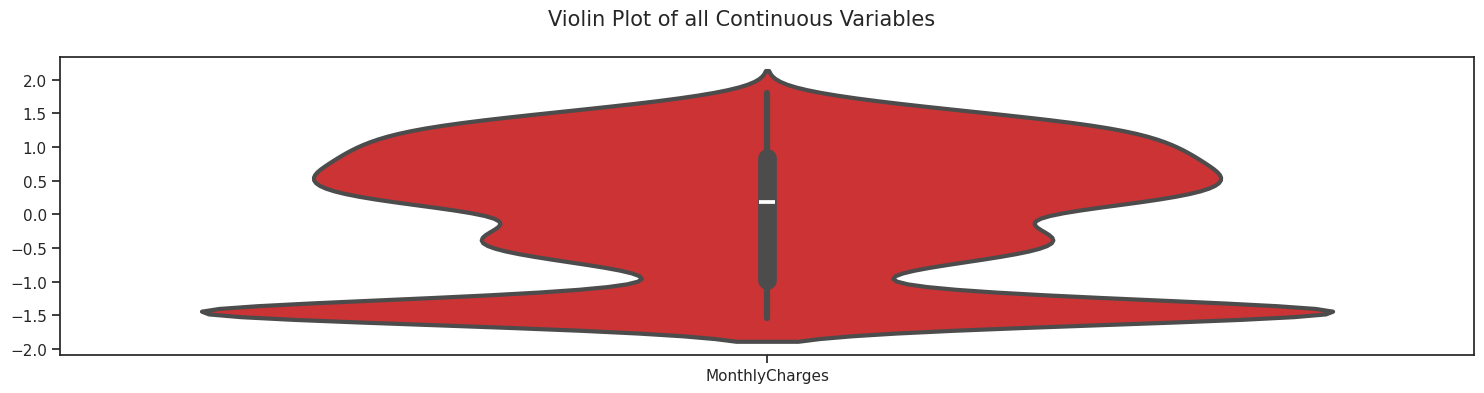

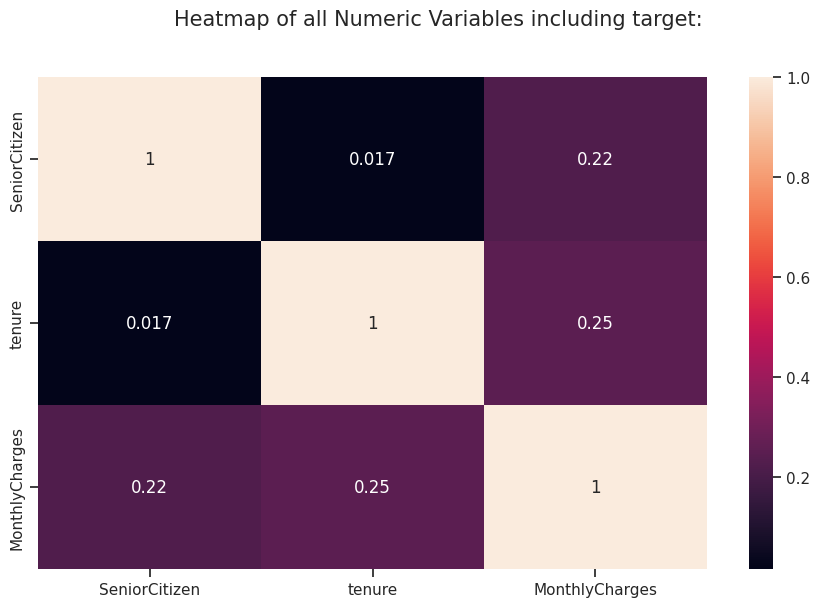

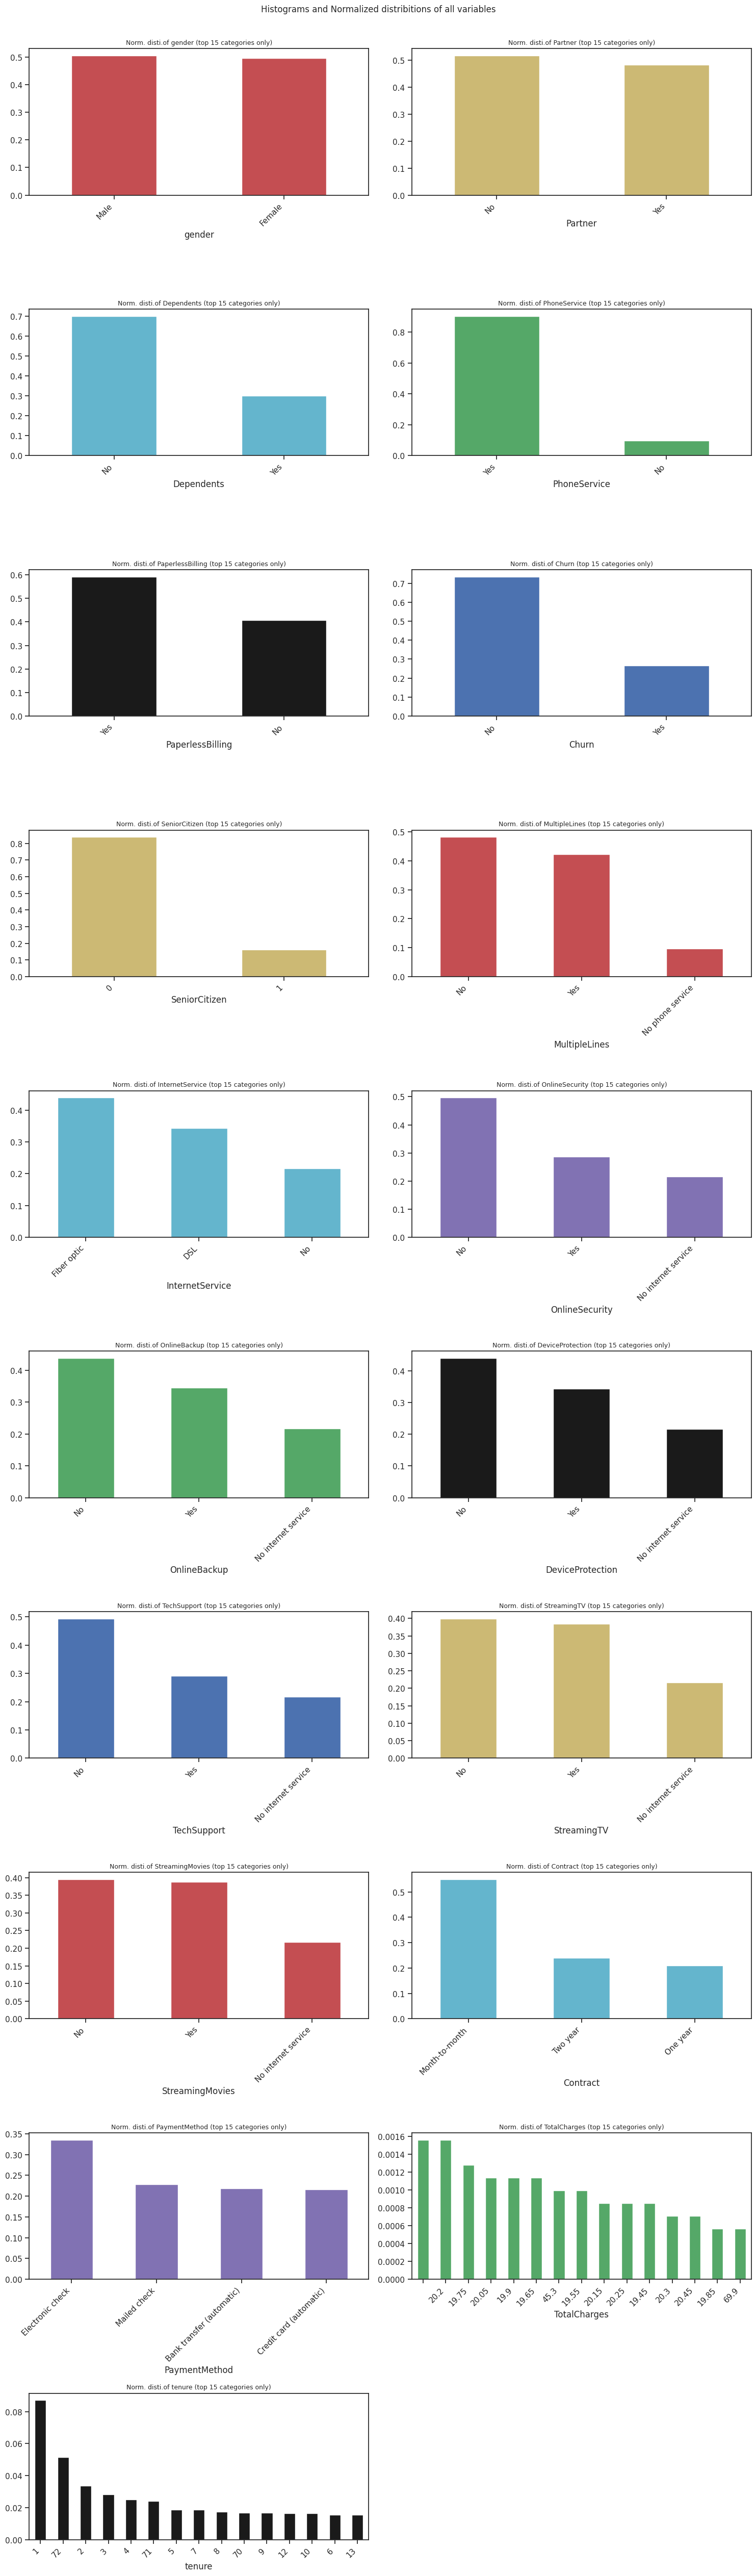

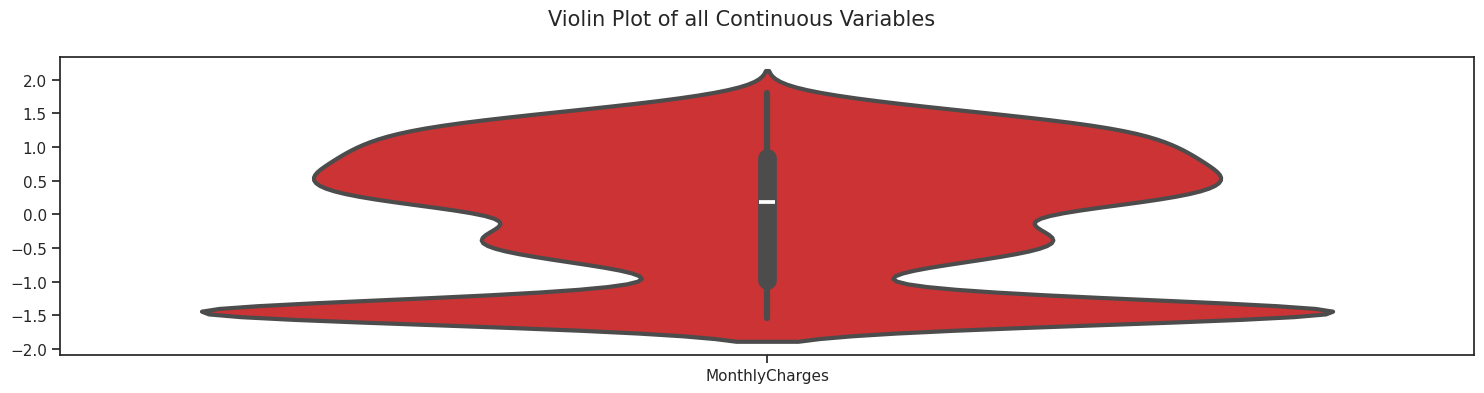

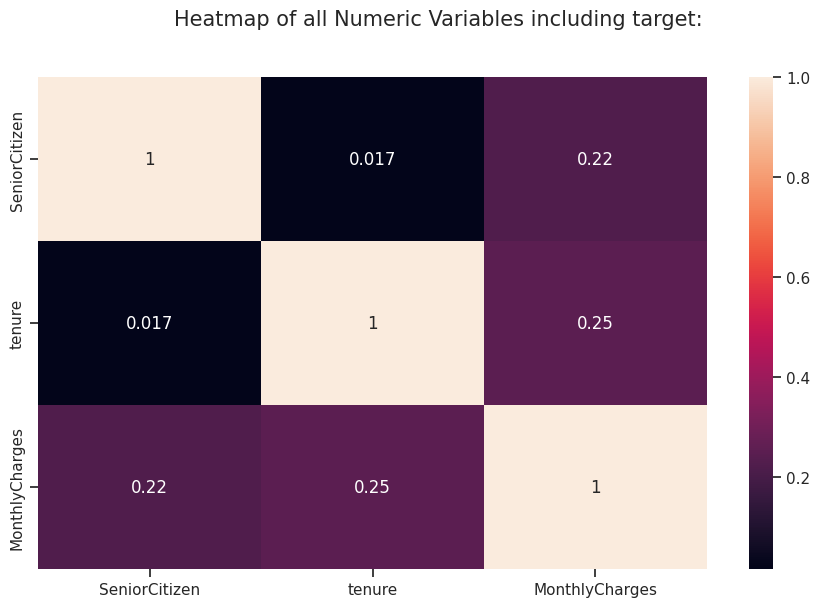

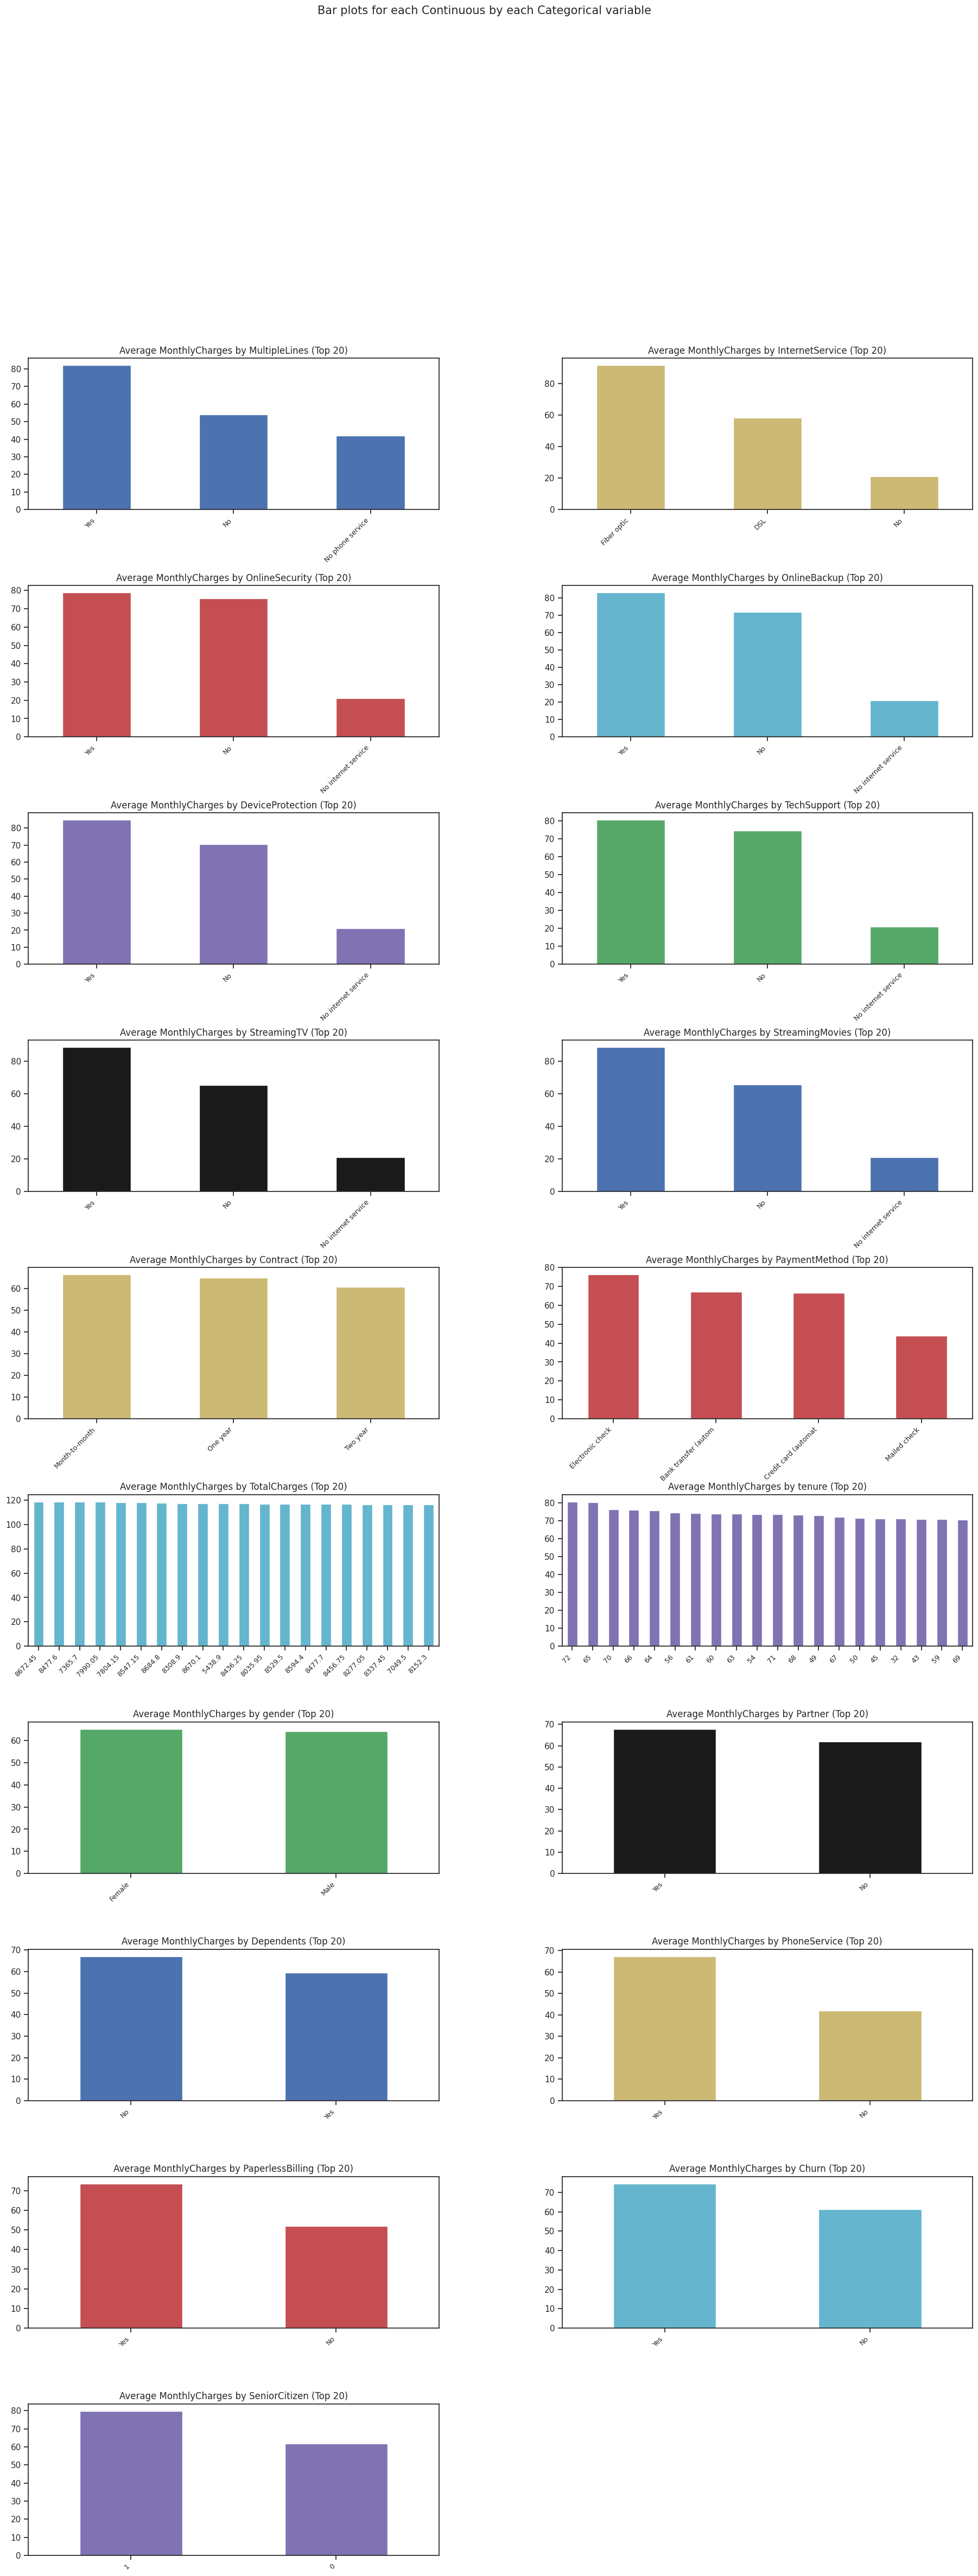

All Plots done
Time to run AutoViz = 9 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


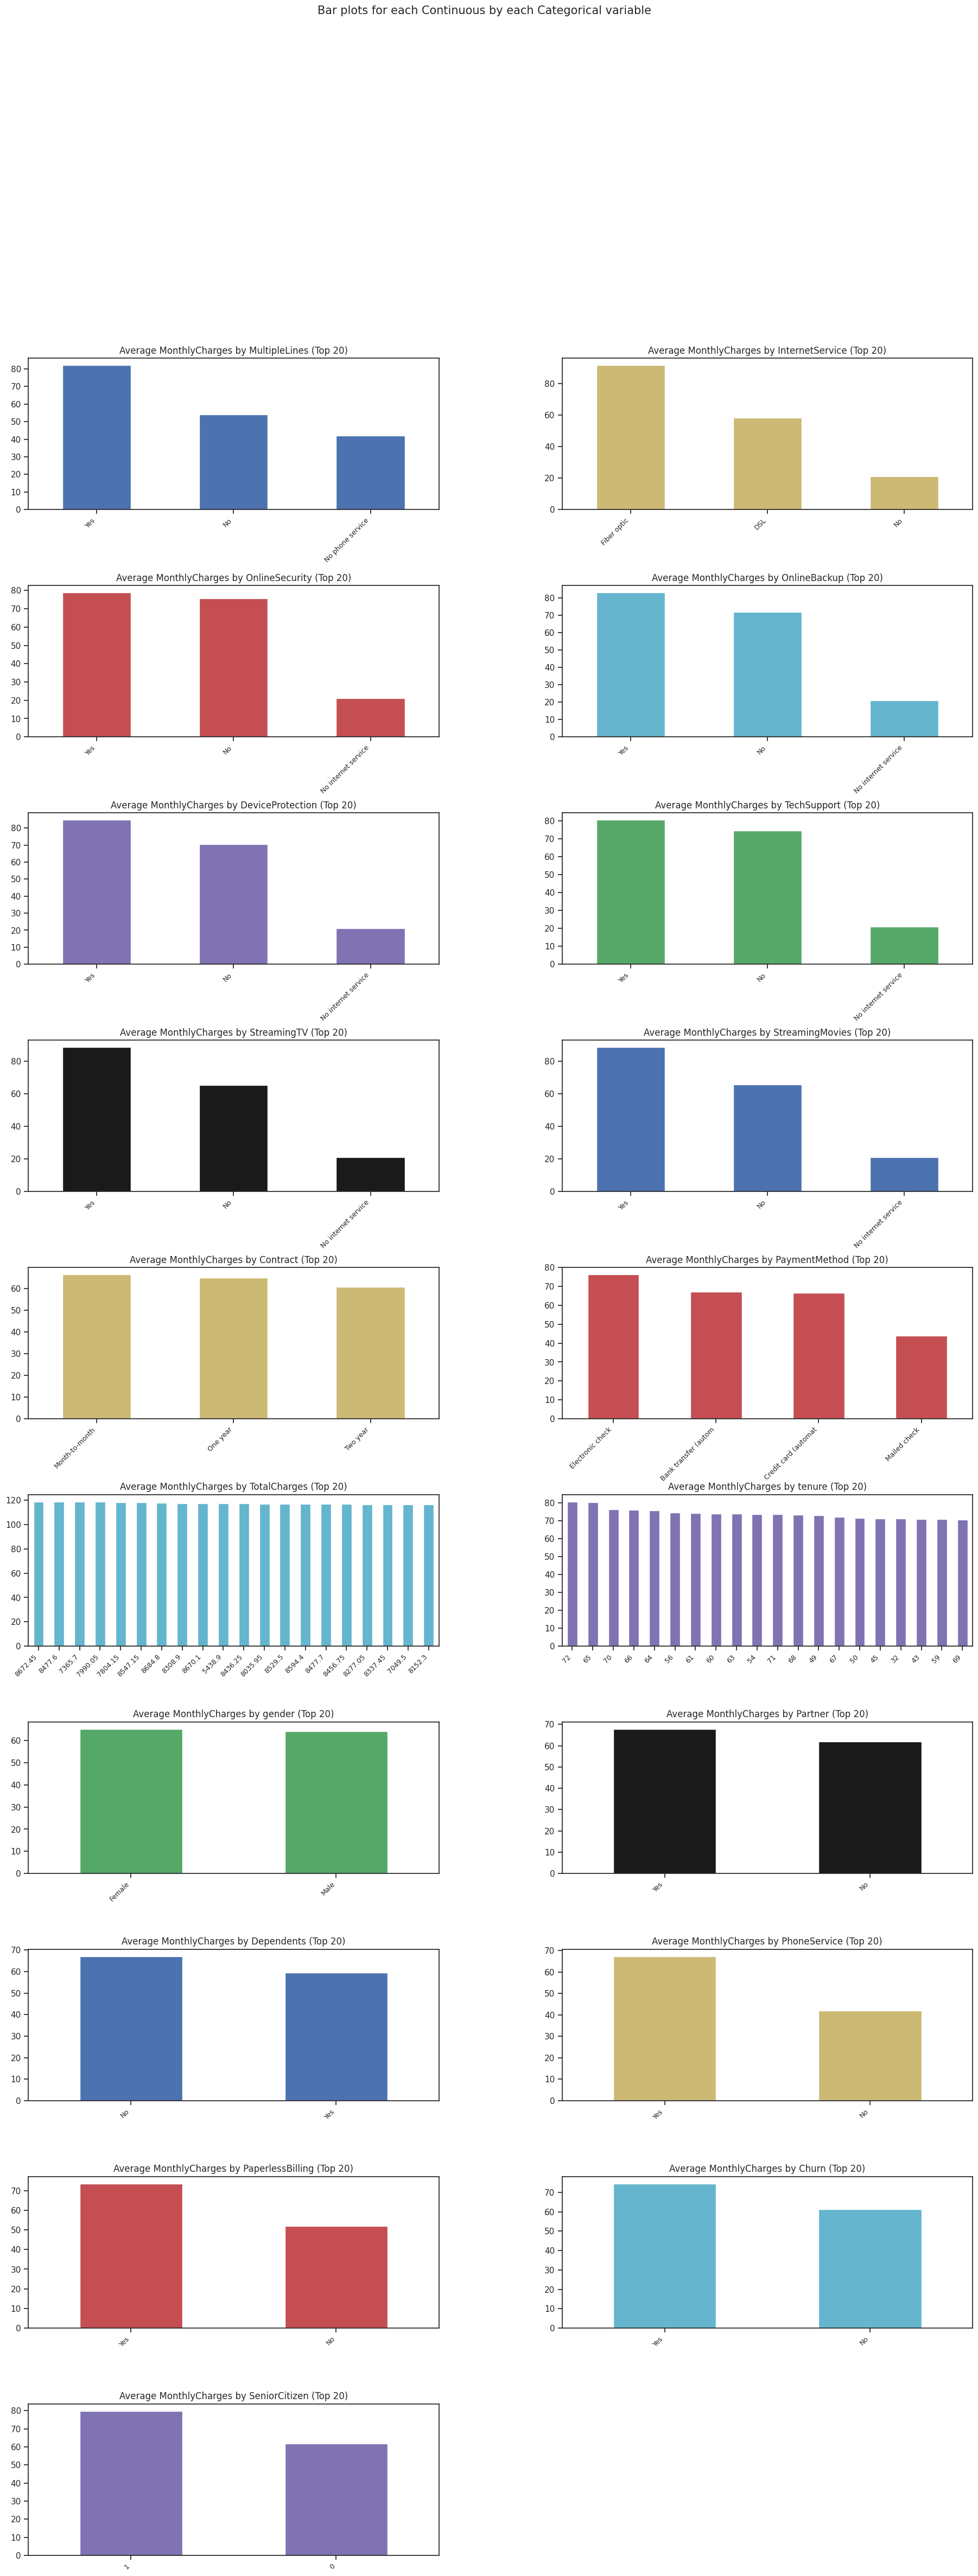

All Plots done
Time to run AutoViz = 9 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [132]:
%matplotlib inline
file_name = "data.csv"
dft = AV.AutoViz(file_name)

**Spliting Dataset**

In [133]:
X=df.drop(columns=['customerID','Churn','TotalCharges','MonthlyCharges','tenure','SeniorCitizen'],axis=1)
Y=df['Churn']

In [134]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

**Creating Pipeline for transformation and model training**

LogisticRegression

In [135]:
logistic_pipeline = Pipeline([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('logisitic_reg',LogisticRegression())
])

In [136]:
logistic_pipeline.fit(X_train,Y_train)

Pipeline(steps=[('cat',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
                ('logisitic_reg', LogisticRegression())])

In [137]:
prediction = logistic_pipeline.predict(X_train)
print(accuracy_score(Y_train, prediction))

0.7921547745828896


Cross validating

In [138]:
scores = cross_val_score(logistic_pipeline, X_train, Y_train, scoring = 'accuracy',cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.77728483 0.79325643 0.78172138 0.77994676 0.80639432]
Mean cross-validation score: 0.7877207443329481


In [140]:
clm_transform = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False),
     ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
])

**SGDClassifier**

In [141]:
sgdClf_pipeline = Pipeline([
    ('cat', clm_transform),
    ('logisitic_reg',SGDClassifier(random_state = 42))
])

In [142]:
sgdClf_pipeline.fit(X_train,Y_train)

Pipeline(steps=[('cat',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('logisitic_reg', SGDClassifier(random_state=42))])

In [143]:
sgdClf_pred = sgdClf_pipeline.predict(X_train)

In [144]:
print(accuracy_score(Y_train, sgdClf_pred))

0.7728079517216897


In [145]:
sgdClf_scores = cross_val_score(sgdClf_pipeline, X_train, Y_train,cv=5, scoring='accuracy')
print("Cross-validation scores:", sgdClf_scores)
print("Mean cross-validation score:", sgdClf_scores.mean())

Cross-validation scores: [0.74977817 0.78970719 0.75332742 0.78083407 0.74422735]
Mean cross-validation score: 0.7635748407015907


**RandomForestClassifier**

In [147]:
rf_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 10,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'bootstrap': True,
    'random_state': 42
}

In [148]:
RandomForest_pipeline = Pipeline([
    ('cat', clm_transform),
    ('logisitic_reg',RandomForestClassifier(**rf_params))
])

In [149]:
RandomForest_pipeline.fit(X_train,Y_train)

Pipeline(steps=[('cat',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('logisitic_reg',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=42))])

In [150]:
forest_train_predict = RandomForest_pipeline.predict(X_train)

In [151]:
print(accuracy_score(Y_train, forest_train_predict))

0.8129215477458289


In [152]:
random_forest_score = cross_val_score(RandomForest_pipeline, X_train, Y_train,cv=5, scoring='accuracy')
print("Cross-validation scores:", random_forest_score)
print("Mean cross-validation score:", random_forest_score.mean())

Cross-validation scores: [0.7755102  0.79414374 0.78172138 0.78083407 0.80017762]
Mean cross-validation score: 0.7864774050789517
